ULOHY OD CHAT GPT/ zapoctove ulohy
---

In [50]:
import diktyonphi as dp
g = dp.Graph(dp.GraphType.UNDIRECTED)

g.add_edge("Praha", "Brno") #tím že tvorím edge, vytvořím i uzly
g.add_edge("Brno", "Ostrava") 
g.add_node("Plzeň")
g.add_node("Olomouc", {"osamělý"})
g.add_node("Hradec Králové", {"osamělý"})

def vypis_uzlu(g):
    print(f"v grafu jsou tyto uzly:")
    seznam = []


    for n in g.node_ids():
        seznam.append(n)
    return seznam
        
print(vypis_uzlu(g))

n = g.node("Praha")
n["info"] = "hlavní město"

n = g.node("Brno")
n["info"] = "toto není město, ale vesnice"


def pokrocili_vypis_vsech_uzlu(g): #s podminkou flag
    print (f"v grafu jsou tyto uzly:")
    for n in g:
        print(f"uzel {n.id} s atributy {n._attrs} a sousedy {list(n.neighbor_ids)}")
        

g.add_edge("Plzeň", "Praha")

pokrocili_vypis_vsech_uzlu(g)

def isolated_nodes(g):
    #ty co nemají žádné sousedy
    seznamek = []
    for n in g:
        if list(n.neighbor_ids) == []:
            seznamek.append(n.id)
    return seznamek if seznamek else "nejsou zde žádné izolované uzly" #pokud neni seznam prázdný, vrátí ho, jinak vrátí hlášku
        
print(isolated_nodes(g))
        





v grafu jsou tyto uzly:
['Praha', 'Brno', 'Ostrava', 'Plzeň', 'Olomouc', 'Hradec Králové']
v grafu jsou tyto uzly:
uzel Praha s atributy {'info': 'hlavní město'} a sousedy ['Brno', 'Plzeň']
uzel Brno s atributy {'info': 'toto není město, ale vesnice'} a sousedy ['Praha', 'Ostrava']
uzel Ostrava s atributy {} a sousedy ['Brno']
uzel Plzeň s atributy {} a sousedy ['Praha']
uzel Olomouc s atributy {'osamělý'} a sousedy []
uzel Hradec Králové s atributy {'osamělý'} a sousedy []
['Olomouc', 'Hradec Králové']


2. příklad (15 bodů)
Implementujte funkci uplny_graf, která vytvoří úplný graf o n uzlech. Úplný graf je neorientovaný graf, jehož každé dva uzly jsou spojeny hranou. Navíc pro otestování vytvořte funkci testuj_uplnost, která ověří, že graf je úplný a to podle věty, že stupeň každého uzlu v úplném grafu je roven n-1.

g = uplny_graf(4) # vrací graf vpravo
testuj_uplnost(g) # vrací True


In [51]:
def uplny_graf(cislo:int):
    g = dp.Graph(dp.GraphType.UNDIRECTED)
    for i in range(1,cislo+1):
        g.add_node(i)
    
    for i in range(1, cislo+1):
        for j in range(i+1, cislo+1):
            g.add_edge(i, j)
    return g

g = uplny_graf(22)

vypis_uzlu(g)

from random import randint
moznost = randint(0,1)

#print(moznost)
if moznost == 1:            #moznost ze nam nahodne pribude jeden node takze to nebude uplny graf .. nebude spojeny ten jeden
    g.add_node("impostor") and print("impostor")
else:
    pass

#pokrocili_vypis_vsech_uzlu(g)

#print(len(g))

def testuj_uplnost(g)->bool:
    kontrola = len(g)
    
    for n in g:
        pocet_sousedu = len(list(n.neighbor_ids))
        #print(pocet_sousedu)
        if pocet_sousedu != kontrola-1:
            return False
        
    return True     #jakmile jeden soused nesplnuje podminku .. neni to uplny graf
        
testuj_uplnost(g)
    
    
    

    

v grafu jsou tyto uzly:
impostor


False

🟡 Úloha 1 – Detekuj osamělé uzly (lehce jinak)
Vytvoř funkci najdi_osamele(g), která najde všechny uzly,
které mají přesně jednoho souseda (např. konce „větví“ v grafu).

In [52]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.UNDIRECTED)

# Stromová větev:
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(2, 4)

# Další větev:
g.add_edge(5, 6)

# Izolovaný uzel:
g.add_node(99)


def najdi_osamele_jeden_soused(g):
    osamele_uzly = []

    for n in g:
        if len(list(n.neighbor_ids)) == 1:
            osamele_uzly.append(n.id)
    
        
    return osamele_uzly

print(najdi_osamele_jeden_soused(g))





[1, 3, 4, 5, 6]


Úloha 4 – Kontrola "hvězdy"
Vytvoř funkci je_hvezda(g), která ověří, zda graf tvoří hvězdici:
1 centrální uzel je spojený se všemi ostatními, ale ty ostatní nejsou propojeny navzájem.
(např. 1 – 2, 1 – 3, 1 – 4, ale žádné 2 – 3, 2 – 4…)

In [53]:
g = dp.Graph(dp.GraphType.UNDIRECTED)
g.add_edge("Slunce", "Merkur")
g.add_edge("Slunce", "Venuše")
g.add_edge("Slunce", "Země")
g.add_edge("Slunce", "Mars")
#g.add_edge("Mars", "Země")     # s timhle to vraci False


vypis_uzlu(g)


def hvezda(Graph)->bool: #ověří zda graf je hvězda
    pocet_uzlu = 0
    necentralni = []
    centralni = None
    for uzel in g.node_ids():
        pocet_uzlu +=1

    for n in g:
        if len(list(n.neighbor_ids)) == (pocet_uzlu-1):      #POKUD POCET SOUSEDU TOHO UZLU JE STEJNY JAKO POCET CELKOVYCH UZLU V GRAFU BEZ NEJ TAK JE CENTRALNI
            centralni = n.id
            pass
        
    for n in g:
        if (n.id != centralni) and (len(list(n.neighbor_ids)) < 2):
            necentralni.append(n.id)
    
    if centralni and (len(necentralni) == (pocet_uzlu-1)):  #POKUD EXISTUJE CENTRALNI UZEL A NECENTRALNICH UZLU JE STEJNY JAKO POCET VSECH UZLU BEZ CENTRALNIHO.. JE TO HVEZDA
        return True
    else:
        return False
            

print(hvezda(g))



v grafu jsou tyto uzly:
True


CYKLY UCENI OD CHATA JA POPISUJU A CHATOVO KODY
---

In [54]:
def has_cycle(graph):
    navstivene = set()          #mnozina zbavujeme se duplicit a overujeme zda jsme tam byli

    def dfs(u, parent):
        navstivene.add(u)                   #pridej momentalni do navstivenych
        for soused in graph.neighbors(u):       #tohle rika co .. pro ty do kterych vede hrana z momentalniho uzlu
            if soused not in navstivene:        #pokud neni v navstivenych pokracuj
                if dfs(soused, u):             #pokud ?? je pravda že soused (ten kam vede hrana) ma hranu do momentalniho uzlu .. 
                    return True             #rekneme ano je to cyklus
            elif soused != parent:          #pokud ten kam vede hrana neni ten odkud vede hrana
                return True             #tak to taky ma cyklus wtf ??? 
        return False                #pokud neni splnena ani jedna podminka vrat ze nema cyklus

    for uzel in graph.node_ids():           #pro kazdy uzel
        if uzel not in navstivene:          #pokud jsme uzel jeste nevideli
            if dfs(uzel, None):             #a pokud je to root uzel
                return True                 # tak mame zase smyčku ?? 
    return False                        #nemame smyčku


In [55]:
import diktyonphi as dp

# Vytvoření neorientovaného grafu s cyklem
g = dp.Graph(dp.GraphType.UNDIRECTED)
g.add_edge("A", "B")
g.add_edge("B", "C")
g.add_edge("C", "C2")  # Tím se vytvoří cyklus A–B–C–A
g.add_edge("B", "B2")
g.add_edge("B", "B3")
#
g.add_edge("B3", "A")       #cyklus

def has_cycle(graph):

    visited = set()

    def dfs(u, parent):
        print(f"🔍 DFS v uzlu {u}, parent: {parent}")
        visited.add(u)

        for neighbor in g.node(u).neighbor_ids:
            print(neighbor)
            if neighbor not in visited:
                if dfs(neighbor, u):
                    return True
            elif neighbor != parent:
                print(f"⚠️ Cyklus detekován: {u} ↔ {neighbor}")
                return True
        return False

    for node in graph.node_ids():
        if node not in visited:
            if dfs(node, None):     #pokud se vrati true tak vrat true pokud false jdi dal
                return True
    return False        #pokud jsme nedostalu true mame hotovo

# Výstup
print("\nMá graf cyklus?", has_cycle(g))





🔍 DFS v uzlu A, parent: None
B
🔍 DFS v uzlu B, parent: A
A
C
🔍 DFS v uzlu C, parent: B
B
C2
🔍 DFS v uzlu C2, parent: C
C
B2
🔍 DFS v uzlu B2, parent: B
B
B3
🔍 DFS v uzlu B3, parent: B
B
A
⚠️ Cyklus detekován: B3 ↔ A

Má graf cyklus? True


S COPILOTENM
---

In [56]:
#vytvoreni neorientovaneho grafu s cyklem a check cyklu
g = dp.Graph(dp.GraphType.UNDIRECTED)
g.add_edge("A", "B")
g.add_edge("B", "C")    
#g.add_edge("C", "A")  # Tím se vytvoří cyklus A–B–C–A
g.add_edge("B", "D")

def has_cycle(graph):
    visited = set() #zjistujeme zda jsme uzel navstivili

    #ted udelame DFS
    def dfs(uzel, rodic):
        visited.add(uzel)
        for soused in graph.node(uzel).neighbor_ids: #čekuju pro kazdyho souseda(kazdeho do ktereho vede hrana z uzlu) 
            if soused not in visited: #pokud soused neni v navstivenych
                #pokud jsem ho jeste nevideli tak na nej zavolame dfs #a tim padem z nej udelame rodice
                if dfs(soused, uzel):
                    return True     #pokud nam dfs vrati true to znamena ze jsme nasli cyklus .. napr ze jsme se dopatrali po dlouhe cestě znovu k uzlu odkud jsme vyšli mame cyklus
            elif soused != rodic:  
                return True  #pokud jsme uzel navstivili a neni to rodic tak mame cyklus #jo tady jde i o tu puvodni podminku pac to uz ji prošlo
        return False  #pokud jsme prošli všechny sousedy a nenasli jsme cyklus vratime false
    
    for uzel in graph.node_ids():  #pro kazdy uzel v grafu
        if uzel not in visited:  #pokud jsme ho jeste nevideli
            if dfs(uzel, None):  #zavolame dfs na uzel a rodic bude None
                return True  #pokud dfs vrati true mame cyklus
    return False  #pokud jsme prošli všechny uzly a nenasli jsme cyklus vratime false
# Výstup
print("\nMá graf cyklus?", has_cycle(g))  # Očekáváme True




Má graf cyklus? False


+-OSAMOTĚ
---

Vytvořte funkci, která otestuje zda je daný neorientovaný graf stromem. Graf je stromem, pokud neobsahuje cyklus (tj. posloupnost hran, po níž se dostaneme znovu do stejného uzlu) a je souvislý (má jen jednu komponentu).


In [57]:
import diktyonphi as dp

tree = dp.Graph(dp.GraphType.UNDIRECTED)
tree.add_edge(1, 2)
tree.add_edge(1, 7)
tree.add_edge(2, 3)
tree.add_edge(2, 4)
tree.add_edge(2, 5)
tree.add_edge(5, 6)
tree.add_node(8)            #eror
tree.add_edge(4,6)          #eror



def ma_cyklus(graph)->bool:
    #udelame si check mnozinu
    visited = set()

    def dfs(uzel, rodic):
        visited.add(uzel)

        for soused in graph.node(uzel).neighbor_ids:     #pro vsechyn sousedy momnentaůniho uzlu
            if soused not in visited:
                if dfs(soused, uzel):
                    return True
            elif rodic != soused:      #zasadni overeni.. pokud nam neni pravda prvni if zkusime jeste druhej a overujeme ze pokud rodic neni soused (coz normalne ma byt)
                return True         #taky mame smyčku
                
        return False                #pokud jsem vse splnili vrat false
    
    for uzel in graph.node_ids():
        if uzel not in visited:     #pokud jsme ho nevideli a 
            if dfs(uzel,None):   #pokud neni root
                return True     #mame smyčku
            
    return False                #pokud jsme nenašli smyčku neni tam 

print(ma_cyklus(tree))


def je_strom(graph):

    def isolated(graph)->bool:
            for n in graph.node_ids():
                if len(list(graph.node(n).neighbor_ids)) == 0:
                    return True #ma izolovany komponent
            return False

    if (ma_cyklus(graph) == False) and (isolated(graph) == False):
        return True
    else:
        return "graf neni stromem"
    
        
    
    
        
        
            


print(je_strom(tree))



True
graf neni stromem


BFS
---
Jasně, tady máš přehledný **slovní nástřel postupu**, jak projít celý neorientovaný graf a najít všechny souvislé komponenty pomocí **BFS** – žádný kód, jen přesný plán krok po kroku 💡:

---

## 🧠 Cíl:

Najít všechny **souvislé komponenty** grafu – každou z nich reprezentovanou jako **seznam uzlů**, které do ní patří.

---

## 📋 Postup (slovně):

1. **Připrav si prázdný seznam komponent**
   → Budeš do něj postupně ukládat seznamy uzlů (každá položka = 1 komponenta).

2. **Připrav si `visited` množinu**
   → Ta bude sloužit k tomu, abys poznal, které uzly už jsi prošel a nemusel se k nim vracet.

3. **Projdi všechny uzly v grafu (např. pomocí `graph.node_ids()`)**
   → Pro každý uzel:

   * Zkontroluj, jestli **už nebyl navštívený** (není v `visited`).
   * Pokud **je nový**, začíná ti **nová komponenta**:

     * Připrav si prázdný seznam pro uzly této komponenty.
     * Spusť BFS (pomocí fronty), která:

       * začne tímto uzlem,
       * a postupně **navštíví všechny uzly propojené s tímto** (přes `neighbor_ids`).
       * každý takový uzel zároveň **přidáš do `visited`** a **do seznamu této komponenty**.

4. **Po dokončení BFS přidej celý seznam uzlů dané komponenty do celkového seznamu komponent.**

5. **Pokračuj na další uzel v grafu.**
   → Pokud už je v `visited`, přeskoč ho.

6. **Až projdeš celý graf, budeš mít seznam všech komponent.**

---

## 📦 Výsledek:

Např. pro graf:

```
1–2–3   4–5   6
```

Vrátíš výstup:

```python
[[1, 2, 3], [4, 5], [6]]
```


([['A', 'B', 'C', 'D', 'E', 'F'], ['X'], ['Y', 'Z']], "toto jsou izolované: ['X']")


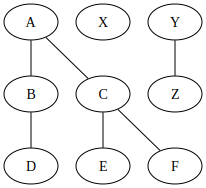

In [58]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.UNDIRECTED)

g.add_edge("A","B")
g.add_edge("A","C")
g.add_edge("B","D")
g.add_edge("C","E")
g.add_edge("C","F")
g.add_node("X")  # izolovaný uzel
g.add_edge("Y", "Z")  # další oddělená komponenta


def komponents(graph)->list:
    visited = set()
    

    all_components = [] #– sem je budeš sbírat

    

    def bfs(graph,start):
        fronta = [start]
        visited.add(start)

        component = []  #v každém běhu BFS
        
        while fronta:       #dokud fronta neni prazdna
            current = fronta.pop(0)
            component.append(current)
            for soused in graph.node(current).neighbor_ids:
                if soused not in visited:
                    visited.add(soused)
                    fronta.append(soused)
                    #print(component)
        all_components.append(component)
            #print(all_components)
        
    for node in graph.node_ids():
        if node not in visited:
            bfs(graph,node)

    isolated_components = []
    for compotent in all_components:
        if len(compotent) == 1:
            isolated_components.extend(compotent)


    return all_components,f"toto jsou izolované: {isolated_components}"


print(komponents(g))


g


In [59]:
g = dp.Graph(dp.GraphType.DIRECTED)

# Spojené uzly
g.add_edge("A", "B")
g.add_edge("B", "C")
g.add_edge("D", "A")

# Izolované uzly
g.add_node("X")  # nemá žádné hrany
g.add_node("Y")  # také nemá žádné hrany

# Uzel Z má pouze odchozí hranu
g.add_edge("Z", "W")  # Z má out-degree = 1, W má in-degree = 1




def isolated(graph):
    isolated_nodes = []
                                                                              
    #def in_degree(graph):
    #    has_in_degree = []
    #    for i in range(list(graph.node_ids())):
    #        for j in range(i+1,list(graph.node_ids())):
    #            if g.node(i).is_edge_to(j):
    #                has_in_degree.append(j)
    #    return has_in_degree

    def in_degree(graph, target_id):
        count = 0
        for node_id in graph.node_ids():
            if target_id in graph.node(node_id).neighbor_ids:
                count += 1
        return count


    def out_degree(graph, target_id):
            return graph.node(target_id).out_degree


    for node in graph.node_ids():
        if ((in_degree(graph, node) < 1) and (out_degree(graph, node) < 1)):
            isolated_nodes.append(node)
        
    return isolated_nodes

print(isolated(g))

#g.node("A").is_edge_to("B")




['X', 'Y']


Jo jasně, pojďme si to dát slovně – tak, abys **mohl sám psát funkci `ma_cyklus_orient()` od nuly** a rozuměl každému kroku.

---

### 🧱 Slovní kostra – co máš udělat:

1. **Vytvoř slovník `barvy`** – ke každému uzlu přiřaď `"white"` (ještě jsme ho nenavštívili).
2. Napiš vnořenou funkci `dfs(u)`:

   * označ uzel `u` jako `"gray"` (začínáme ho zkoumat),
   * pro každý jeho sousední uzel:

     * pokud je `"gray"` → **cyklus** → vrať `True`,
     * pokud je `"white"`, rekurzivně spusť `dfs()` → pokud se vrátí `True`, taky vrať `True`.
   * nakonec označ `u` jako `"black"` (úplně zpracován),
   * vrať `False`, pokud žádný cyklus nenajdeš.
3. Ve vnější funkci `ma_cyklus_orient()`:

   * spusť `dfs()` z každého uzlu, který je `"white"`,
   * pokud někdy vrátí `True`, vrať `True`.
4. Jinak vrať `False`.




In [60]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.DIRECTED)

g.add_edge("A", "B")
g.add_edge("B", "C")
#g.add_edge("C", "A")  # ← tady je cyklus: A → B → C → A

g.add_edge("D", "E")  # bez cyklu
g.add_node("X")       # izolovaný uzel


def ma_cyklus_orient(graph):
    barvy = {node_id: "white" for node_id in graph.node_ids()}

    def dfs(uzel):
        barvy[uzel] = "gray"
        komponenty = 0


        for soused in graph.node(uzel).neighbor_ids:
            if barvy[soused] == "gray":
                return True
            
            if barvy[soused] == "white" and dfs(soused):
                return True
            
        barvy[uzel] = "black"
    
        return False
    komponenty = 0
    for node in graph.node_ids():
        if barvy[node] == "white":
            if dfs(node):
                return True, komponenty
            
            komponenty += 1
    return False, komponenty
    

    
ma_cyklus_orient(g)



(False, 3)

In [61]:
import diktyonphi as dp
g = dp.Graph(dp.GraphType.UNDIRECTED)
g.add_edge("Slunce", "Merkur")
g.add_edge("Slunce", "Venuše")
g.add_edge("Slunce", "Země")
g.add_edge("Slunce", "Mars")
g.add_edge("Mars", "Země")

print(vypis_uzlu(g))

def hvezda(g): #ověří zda graf je hvězda
    pocet_uzlu = 0
    necentralni = []
    for uzel in g.node_ids():
        pocet_uzlu +=1

    for n in g:
        if len(list(n.neighbor_ids)) == (pocet_uzlu-1):      #POKUD POCET SOUSEDU TOHO UZLU JE STEJNY JAKO POCET CELKOVYCH UZLU V GRAFU BEZ NEJ TAK JE CENTRALNI
            centralni = n.id
            pass
    for n in g:
        if (n is not centralni) and (len(list(n.neighbor_ids)) < 2):
            necentralni.append(n.id)
    
    if centralni and (len(necentralni) == (pocet_uzlu-1)):  #POKUD EXISTUJE CENTRALNI UZEL A NECENTRALNICH UZLU JE STEJNY JAKO POCET VSECH UZLU BEZ CENTRALNIHO.. JE TO HVEZDA
        return True
    else:
        return False
            

print(hvezda(g))

v grafu jsou tyto uzly:
['Slunce', 'Merkur', 'Venuše', 'Země', 'Mars']
False


Jasně – tady máš **formální zadání** přesně ve stylu zápočtových úloh:

---

### ✅ Zadání: Topologické třídění v orientovaném grafu

**Napište funkci:**

```python
def topo_sort(graph: dp.Graph) -> list[str]:
```

**Popis:**

Funkce `topo_sort` provede **topologické třídění** nad orientovaným grafem bez cyklů (DAG). Výstupem je seznam všech uzlů v takovém pořadí, že pro každou orientovanou hranu `u → v` uzel `u` bude v seznamu **dříve** než `v`.

---

### 📥 Vstup:

* `graph`: instance třídy `dp.Graph` (z `diktyonphi`) typu `DIRECTED`
* Graf může obsahovat více **komponent** a také **izolované uzly** (tj. uzly bez hran)

---

### 📤 Výstup:

* Seznam (`list[str]`) topologicky seřazených uzlů
* Pokud má graf **cyklus**, vrať `None`

---

### 🧪 Příklad:

Pro graf:

```plaintext
A → C
B → C
C → D
D → E
E → F
```

a izolovaný `G`, možný výstup:

```python
['A', 'B', 'C', 'D', 'E', 'F', 'G']
```

---

Chceš ještě minitestovací graf pro kontrolu výsledku?


['A', 'B', 'C', 'D', 'E', 'F', 'G']


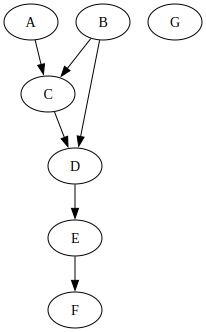

In [62]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.DIRECTED)

g.add_edge("A", "C")
g.add_edge("B", "C")
g.add_edge("C", "D")
g.add_edge("D", "E")
g.add_edge("B", "D")  # B → D (další závislost)
g.add_edge("E", "F")  # přidání delší cesty
g.add_node("G")       # izolovaný uzel (bez hran)



def topo_sort(graph: dp.Graph) -> list[str]:
    sortedd = []
    
    for node in graph.node_ids():
        sortedd.append(node)
    

    return sorted(sortedd)

print(topo_sort(g))

g

#FIXME TEZCE JSEM TO OJEBAL MA SE TO DELAT UPLKNE JINAK JA JEN SERADIL SEZNAM XD

TODAY NO GO FOR ME BUT ZKUSIM TO OD CHATKA POCHOPIT:
---
4. příklad (40 bodů)

Vytvořte vlastní třídu WeightedGraph (s pomocí třídy DictyonPhi.Graph) representující jednoduchý ohodnocený orientovaný graf, jehož každá hrana má přiřazenu váhu (racionální číslo ≥ 0). Třída by měla mít následující metody:

1.	konstruktor, který očekává matici vah  (tj. čtvercovou matici, jejíž prvek na i-tém řádku a j-tém sloupci určuje váhu hrany vedoucího z uzlu i do uzlu j, pokud taková hrana neexistuje, pak má daný prvek hodnotu -1). Matice je representována seznamem řádků (což jsou opět seznamy).
2.	metodu get_graph, která vrací objekt třídy  DictyonPhi.Graph
3.	metodu component_count, která vrací počet komponent v tomto grafu
4.	metodu nebo vlastnost get_sorted_weights, která vrací iterátor přes všechna ohodnocení v grafu od nejmenší k největší.

vyzkoušejte na grafu:

wg = WeightedGraph([[-1,  1, 0], 
                    [-1, -1, 0.5], 
                    [-1,  1, -1]])


Hrany (zdroj → cíl, váha):
0 → 1   (w = 1)
0 → 2   (w = 0)
1 → 2   (w = 0.5)
2 → 1   (w = 1)

Počet komponent: 1
Seřazené váhy: [0.0, 0.5, 1.0, 1.0]


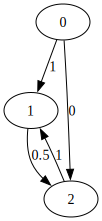

In [63]:
import diktyonphi as dp
from typing import List, Iterator

class WeightedGraph:
    """
    Jednoduchý ohodnocený orientovaný graf postavený
    nad DictyonPhi.Graph.

    • uzly: řádky/-sloupce matice (číslované 0..n-1)
    • hrana existuje, jen pokud mat[i][j] >= 0
    • váha hrany = hodnota mat[i][j]
    """

    # ─────────────────────────────────────────────
    # 1) KONSTRUKTOR – převod matice na graf
    # ─────────────────────────────────────────────
    def __init__(self, matrix: List[List[float]]):
        n = len(matrix)
        if any(len(row) != n for row in matrix):
            raise ValueError("Matice musí být čtvercová (n × n).")

        self._graph = dp.Graph(dp.GraphType.DIRECTED)

        # přidáme uzly "0", "1", …, "n-1"
        for i in range(n):
            self._graph.add_node(str(i))

        # přidáme hrany s vahami
        for i in range(n):
            for j in range(n):
                w = matrix[i][j]
                if w >= 0:
                    self._graph.add_edge(str(i), str(j), {"weight": w})

    # ─────────────────────────────────────────────
    # 2) get_graph – vrací interní DictyonPhi.Graph
    # ─────────────────────────────────────────────
    def get_graph(self) -> dp.Graph:
        return self._graph

    # ─────────────────────────────────────────────
    # 3) component_count – kolik má graf komponent
    #    (slabě souvislých; tj. směry ignorujeme)
    # ─────────────────────────────────────────────
    def component_count(self) -> int:
        visited = set()
        comp = 0

        for node_id in self._graph.node_ids():
            if node_id in visited:
                continue
            comp += 1
            # BFS „po obou směrech“ – počítáme slabou souvislost
            queue = [node_id]
            visited.add(node_id)
            while queue:
                cur = queue.pop(0)
                cur_node = self._graph.node(cur)
                # odchozí sousedé
                nbrs = list(cur_node.neighbor_ids)
                # příchozí sousedé (= ti, co mají hranu do cur)
                nbrs += [
                    n for n in self._graph.node_ids()
                    if cur in self._graph.node(n).neighbor_ids
                ]
                for nxt in nbrs:
                    if nxt not in visited:
                        visited.add(nxt)
                        queue.append(nxt)
        return comp

    # ─────────────────────────────────────────────
    # 4) get_sorted_weights – iterator vah od nejmenší po největší
    # ─────────────────────────────────────────────
    @property
    def get_sorted_weights(self) -> Iterator[float]:
        weights = []
        for node_id in self._graph.node_ids():
            node = self._graph.node(node_id)
            for nbr in node.neighbor_ids:
                w = node.to(nbr)["weight"]
                weights.append(float(w))
        return iter(sorted(weights))


# ─────────────────────────────────────────────
# ► TEST podle zadání
# ─────────────────────────────────────────────
wg = WeightedGraph([
    [-1,  1, 0],
    [-1, -1, 0.5],
    [-1,  1, -1]
])

g = wg.get_graph()

print("Hrany (zdroj → cíl, váha):")
for src in g.node_ids():
    for dst in g.node(src).neighbor_ids:
        w = g.node(src).to(dst)["weight"]
        print(f"{src} → {dst}   (w = {w})")

print("\nPočet komponent:", wg.component_count())
print("Seřazené váhy:", list(wg.get_sorted_weights))

g

navrhni funkce ktera bude pocitat komponenty neorientovaneho grafu
---

(2, {'C', 'Y', 'E', 'B', 'D', 'F', 'X', 'H', 'A'})


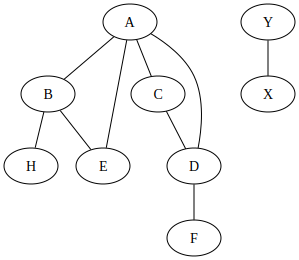

In [64]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.UNDIRECTED)

g.add_edge("A", "B")
g.add_edge("A", "C")
g.add_edge("A", "D")
g.add_edge("A", "E")
g.add_edge("B", "E")
g.add_edge("B", "H")
g.add_edge("D", "F")
g.add_edge("Y", "X")        #druhej
g.add_edge("C", "D")

def komponenty(graph):
    visited = set()
    num_of_comps = 0
        
    def bfs(graph,start):
        inner_visited = set()
        queue = [start]
        inner_visited.add(start)
        
        while queue:
            current = queue.pop(0)
            for node in graph.node(current).neighbor_ids:    #podivej se na 
                if node not in inner_visited:
                    inner_visited.add(node)
                    queue.append(node)
        return inner_visited
         
    import random
    while len((list(graph.node_ids()))) != len(list(visited)):
        unvisited = set(graph.node_ids()) - visited
        
        node = random.choice(list(unvisited))    
        visited.update(bfs(graph, node))  #pokud jsme ho nevideli tak je to asi jinej komponent
              
        num_of_comps += 1
    return num_of_comps,visited
    
    
print(komponenty(g))
        
        
        #zacianci podminka kterou nemam xd

            
g
    


UDELEJ FUNKCI KTERA U ORIENTOVANEHO I NEORIENTOVANYHO GRAFU UDELA MATICI OSUSEDNOSTI
---

In [65]:
pass

In [66]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.DIRECTED)

g.add_edge("A", "C")
g.add_edge("B", "C")
g.add_edge("C", "D")
g.add_edge("D", "E")
g.add_edge("B", "D")  # B → D (další závislost)
g.add_edge("E", "F")  # přidání delší cesty
g.add_node("G")    


def mat_sou(graph):
    mat_s = list()
    
    for node in graph.node_ids():
        radek = list()
        for pot_soused in graph.node_ids():
            if graph.node(node).is_edge_to(pot_soused):
                radek.append(1)
                
            else:
                radek.append(0)
        mat_s.append(radek)
    
    
    return mat_s
                
(mat_sou(g))



[[0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

[0, 1]
[0, 1, 2]
[3, 4]
[5, 6]
3


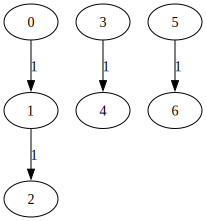

In [67]:
import diktyonphi as dp


class WeigtedGraph(dp.Graph):
    def __init__(self, matrix):
        """vstup musí být čtvercová matice: [x,x,x]""" 
        super().__init__(dp.GraphType.DIRECTED)
        self.matrix = matrix
        self.get_graph()
        self.component_count()  
        self.get_sorted_weights()
        
    def get_graph(self):
        for i in range(len(self.matrix)):       
            for j in range(len(self.matrix)):
                if self.matrix[i][j]!=(-1):
                    
                    self.add_edge(i,j, {"weight": self.matrix[i][j]})
                    
    def component_count(self):        #FIXME MUSIM POUZIT DFS JE TO ORIENTOVANEJ GRAF XDDD
        visited = set()
        komponenty = []

        def bfs(self,start):
            visited.add(start)
            #komponent = []
            komponent = [start]  #FIXME CHATKO PORADIL PŘIDAL START ROVNOU
            fronta = [start]
            
            while fronta:
                current = fronta.pop(0)
                for node in self.node(current).neighbor_ids:
                    if node not in visited:
                        visited.add(node)
                        fronta.append(node)
                        komponent.append(node)
                        print(komponent)
            komponenty.append(list(komponent))
            return komponent
        
        for node in self.node_ids():
            if node not in visited:
                bfs(self, node)
                
        return print(len(komponenty))
        
    
        
    def get_sorted_weights(self):
        ...
            




    """prvni radkek == nultej node .. prvni sloupec vlatni vztah vaha ..
        druhy sloupec vaha k druhemu radku(prvni node) .. 
        treti slooupec vaha k druhemu radku (druhy node)"""
                
# wg = WeigtedGraph([[-1,  1, 0], 
#                     [-1, -1, 0.5], 
#                     [-1,  1, -1]])

matice = [
    [-1,  1, -1, -1, -1, -1, -1],  # 0 → 1
    [-1, -1,  1, -1, -1, -1, -1],  # 1 → 2
    [-1, -1, -1, -1, -1, -1, -1],  # 2

    [-1, -1, -1, -1,  1, -1, -1],  # 3 → 4
    [-1, -1, -1, -1, -1, -1, -1],  # 4

    [-1, -1, -1, -1, -1, -1,  1],  # 5 → 6
    [-1, -1, -1, -1, -1, -1, -1],  # 6
]

wg = WeigtedGraph(matice)
wg


1. příklad (15 bodů) – Lehký
Do třídy Graph přidejte metodu has_self_loop, která pro daný orientovaný graf zjistí, zda obsahuje alespoň jednu smyčku (tj. hranu z uzlu do něj samého).

Vyzkoušejte na grafu:

In [68]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.DIRECTED)  
g.add_edge(1, 2)  
g.add_edge(2, 3)  
g.add_edge(3, 3)  # smyčka  


def smycka_questionmark(graph):
    for i in graph.node_ids():
        if graph.node(i).is_edge_to(i):
            return True
        
    return False        #FIXME CHATKO MI PORADIL ZE TO MAM ODSADIT AZ ZA KONEC SMYČKY JINAK JSEM TO MĚL SPRAVNE JUPI ASI ZA 5 MINUT
    

print(smycka_questionmark(g))

True


2. příklad (15 bodů) – Lehký
Zadání:
Implementujte funkci cyklicky_graf(n), která vytvoří orientovaný graf s n uzly tvořící jeden jednoduchý cyklus (např. 0 → 1 → 2 → … → n-1 → 0).

Dále vytvořte funkci je_cyklus(g: Graph) -> bool, která vrátí True, pokud daný orientovaný graf tvoří právě jeden jednoduchý cyklus, jinak False.


g = cyklicky_graf(5)
print(je_cyklus(g))  # očekávaný výstup: True


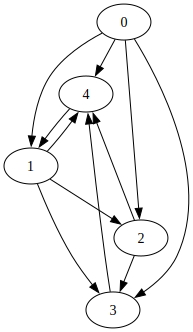

In [ ]:
import diktyonphi as dp     #FIXME JE TO NAHOVNOdd

def cyklicky_graf(n:int):
    g = dp.Graph(dp.GraphType.DIRECTED)

    listik = list(range(n))
    g.add_edge(listik[-1],listik[1])


    for i in range(n):
        for j in range(i+1,n):
            g.add_edge(i,j)

    return g



cyklicky_graf(5)


True
True
True


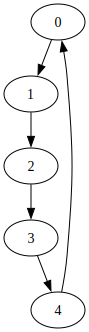

In [ ]:
import diktyonphi as dp 

def cyklicky_graf(n:int):
    g = dp.Graph(dp.GraphType.DIRECTED)
    
    for i in range(n-1):
        g.add_edge(i,(i+1))
   
    listik = list(range(n))
    g.add_edge(listik[-1],listik[0])
    return g

def je_cyklicky(graph):
    out_degree = True
    in_degree = True
    
    for node in graph.node_ids():
        if graph.node(node).out_degree != 1:
           out_degree = False
        
    
    for target in graph.node_ids():     #náš cíl je postupně každý node
        count = 0                       #čítč kterej se obnovi kazdou iteraci
        for node in graph.node_ids():       #pro kazdy node v grafu
            if target in graph.node(node).neighbor_ids:         #pokud nas pozadovany node je neci soused coz by mel byt jeden node tak pricti
                count += 1 
        if count != 1:                  #pokud nejsi nici soused mas smulu chlapce
            return False
    
    
    # for node in graph.node_ids():
    #     for soused in graph.node(node).neighbor_ids:
    #         if graph.node(soused).is_edge_to(node) != 1:
    #             print(graph.node(soused).is_edge_to(node)) 
                
    #             in_degree = False
        
        
        
        
    print(out_degree)
    print(in_degree)
            
    if out_degree and in_degree:
        return True
    else:
        return False
    
    
    

g = (cyklicky_graf(5))
#g.add_node("D")

print(je_cyklicky(g))
g

3. úloha (30 bodů – středně těžká)

Zadání:
Vytvořte funkci pocet_komponent(g: Graph), která pro neorientovaný graf vrátí počet jeho komponent.


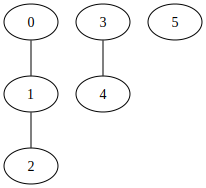

In [ ]:
import diktyonphi as dp

g = dp.Graph(dp.GraphType.UNDIRECTED)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(3, 4)
g.add_node(5)


def pocet_komponent(graph):
    komponenty = 0
    visited = set()
    
    def bfs(graph, start):
        # komponent = 0
        visited.add(start)
        queue = list()
        queue.append(start)
        
        while queue:
            current = queue.pop(0)
            
            for node in graph.node_ids():
                for soused in graph.node(current).neighbor_ids:
                    if soused not in visited:
                        visited.add(soused)
                        queue.append(soused)
                # komponent += 1
        # komponenty += komponent
        # print(komponent)
        
    for node in graph.node_ids():
        if node not in visited:
            bfs(graph, node)
            komponenty +=1  #FIXME CHAT MI PORADIL JEN KDE MAM SCITAT KOMPONENTY JO JE TO TADY XD
    return komponenty

pocet_komponent(g)
            
g

4. příklad (40 bodů) – Těžký

Vytvořte třídu DirectedAcyclicGraph, která:
	•	přijímá seznam hran ve formátu [(0, 1), (1, 2)]
	•	automaticky zkontroluje, že graf je acyklický
(při pokusu o přidání hrany, která by vytvořila cyklus, vyhodí výjimku)
	•	poskytne metodu topologicke_trideni(), která vrátí topologické uspořádání uzlů (pokud existuje)

In [ ]:
import diktyonphi as dp

class DirectedAcyclicGraph(dp.Graph):
    def __init__(self, list:list):
        super().__init__(dp.GraphType.DIRECTED)
        self.list = list
        
        
        
        

dag = DirectedAcyclicGraph([(0, 1), (1, 2), (2, 3)])    #usporadane dvojice
dag.topologicke_trideni()  # očekávaný výstup např.: [0, 1, 2, 3]